In [ ]:
Red Wine Quality Prediction Project
Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine.
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) 
variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced
(e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure 
if all input variables are relevant. So it could be interesting to test feature selection methods.


In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, classification_report

In [9]:
import os
os.getcwd()

'C:\\Users\\Dell\\jupyter saved file\\machine learning project'

In [112]:
df=pd.read_csv(r'C:\Users\Dell\jupyter saved file\dataset\wine.csv')

In [113]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Medium,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Medium,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Medium,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Medium,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,High,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,High,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Medium,5


In [114]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

In [115]:
df.columns=(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'])
      

In [116]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [117]:
df.shape

(1599, 13)

In [118]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [119]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [121]:
from sklearn.preprocessing import OrdinalEncoder

In [122]:
ord_encoder = OrdinalEncoder(categories=[['Low','Medium','High']])


In [123]:
df1=ord_encoder.fit_transform(df[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [124]:
df['Alcohol_content']=df1

In [125]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


In [126]:
# plotting Heatmap
# Letus try to reduce features by using different Technique

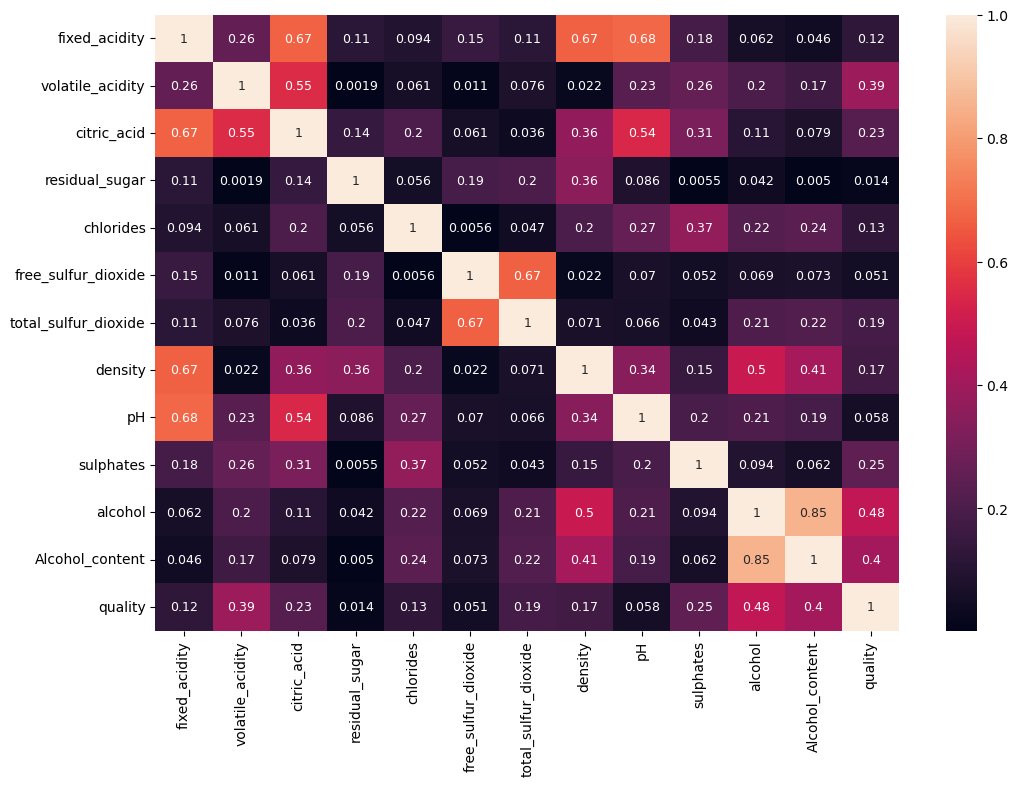

In [127]:
df_corr=df.corr().abs() # This code will give coefficient of one variables with respect to all variables
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':9})
plt.show()

In [128]:
# from above heat map alcohol ontent and alcohol are correlated but we will check for other proof also.

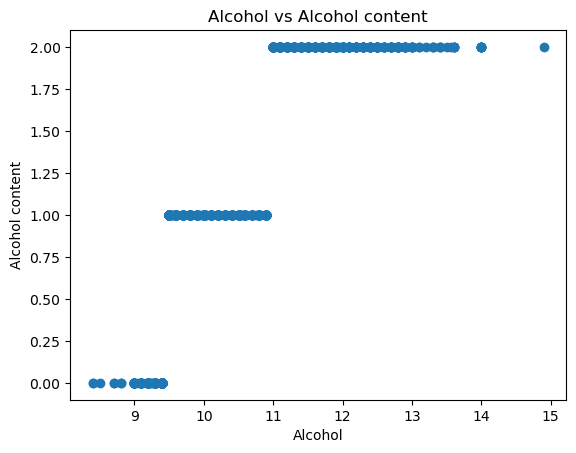

In [129]:
plt.scatter(df.alcohol, df.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol content')
plt.title('Alcohol vs Alcohol content')
plt.show()

In [130]:
#from above Graph we can see that alcohol and alcohol content are correlated .

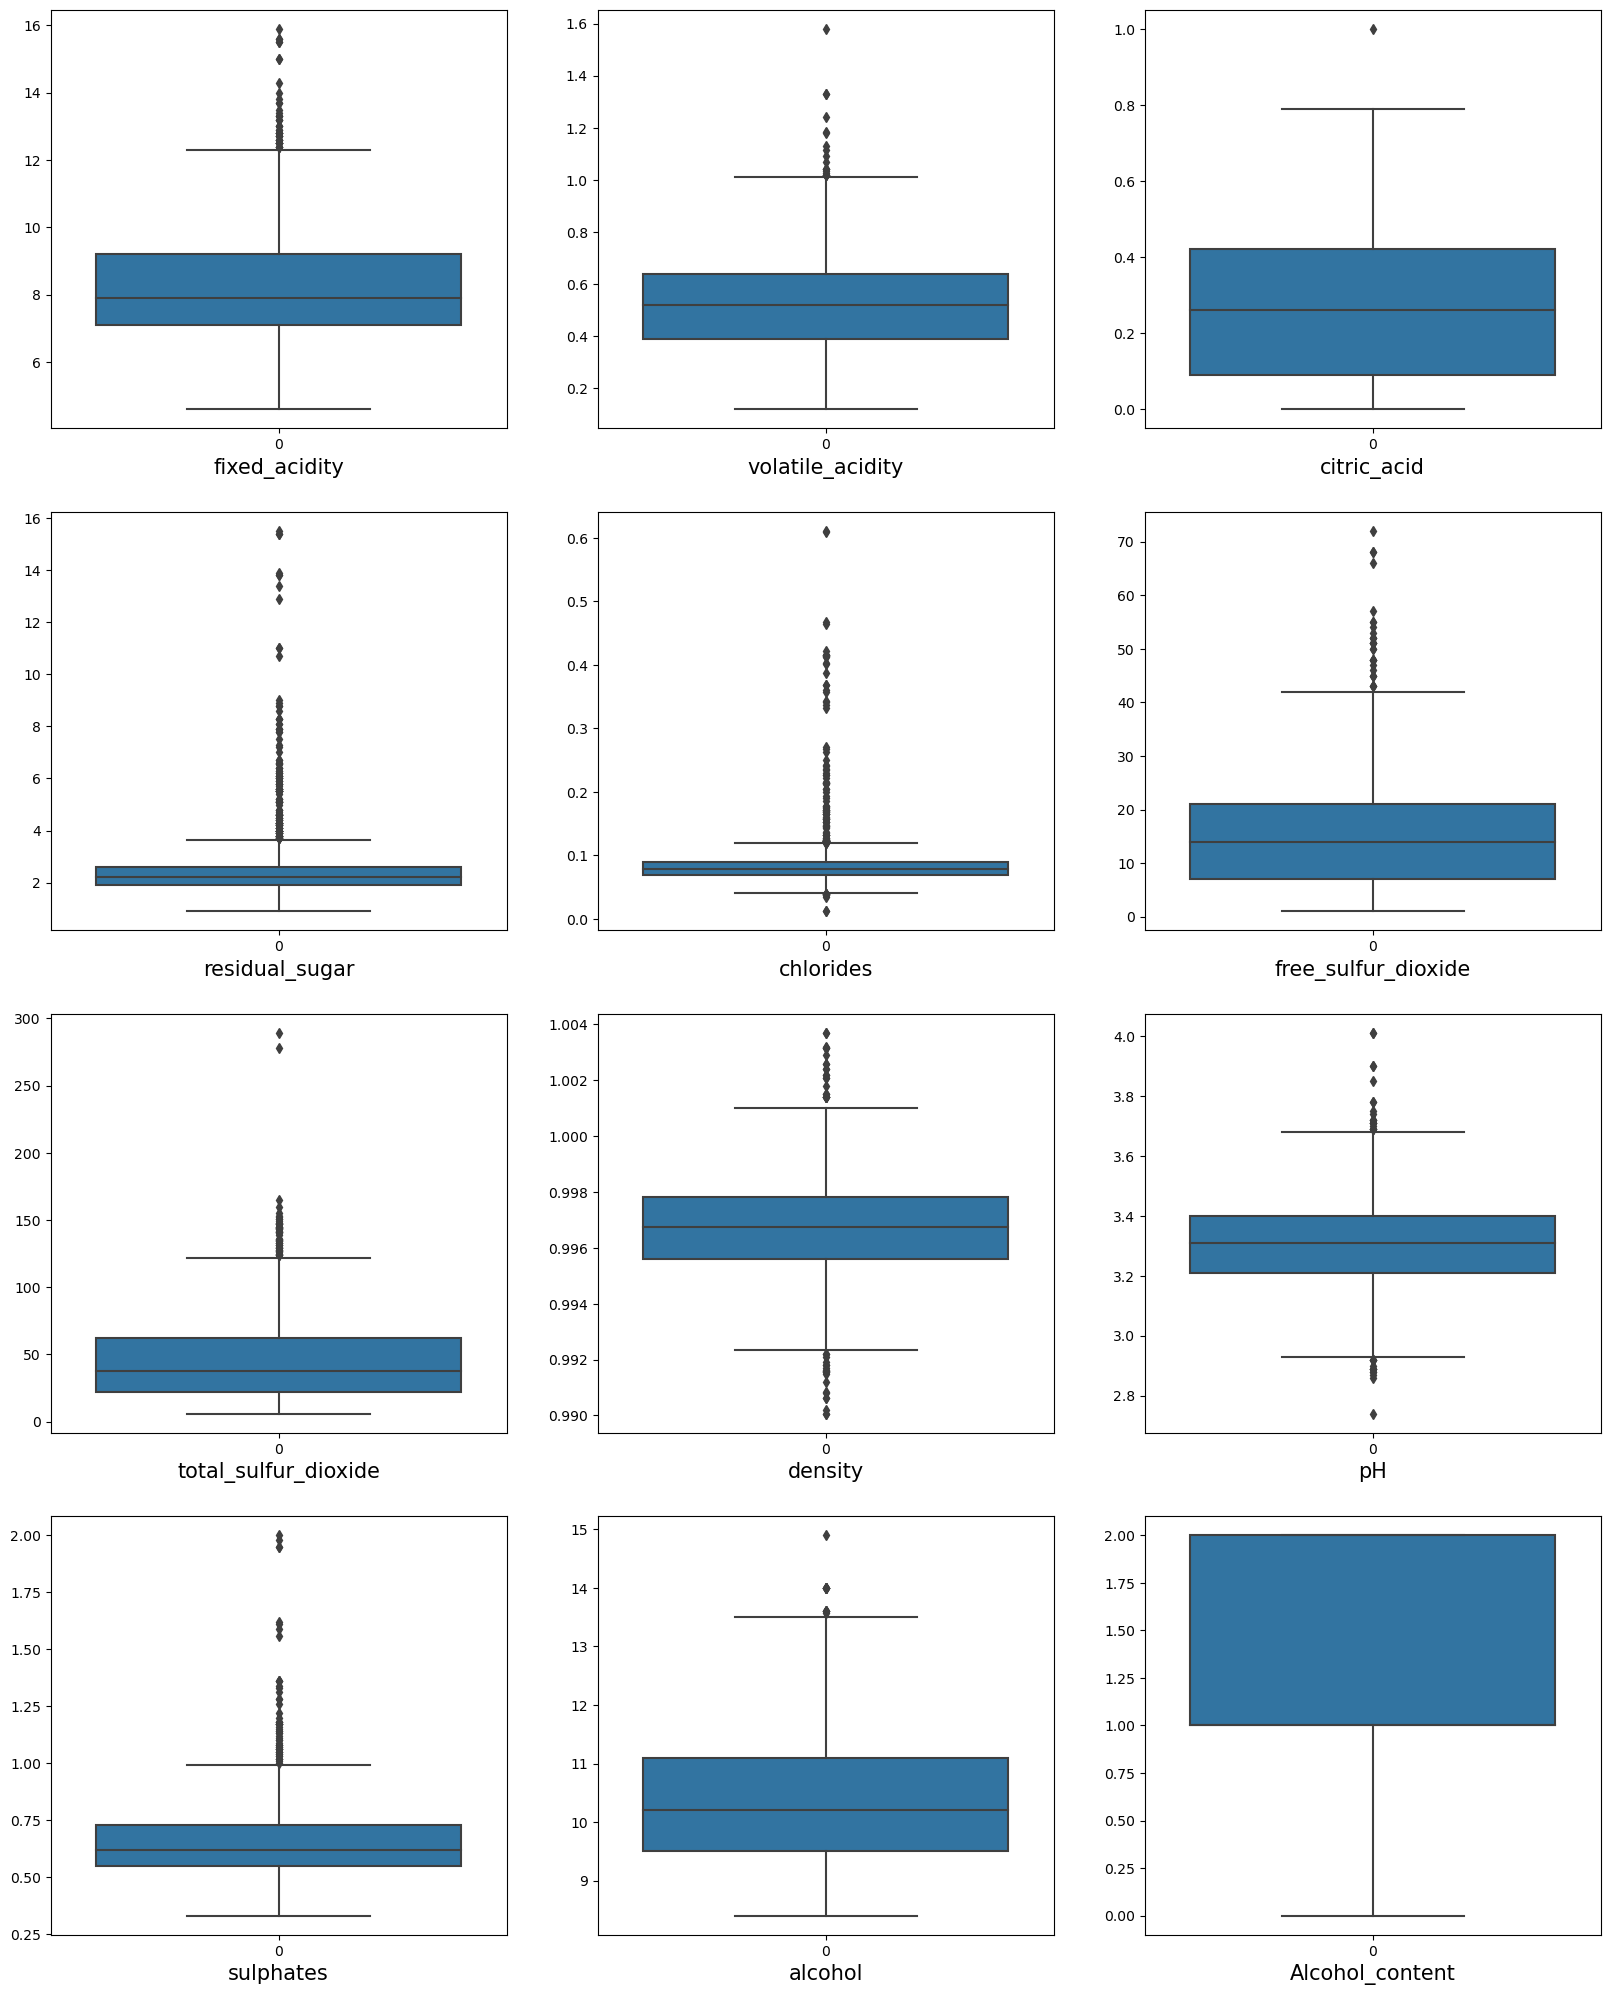

In [131]:
plt.figure(figsize=(20,25))
graph=1
for column in df:
    if graph<=12:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data= df[column])
        plt.xlabel(column,fontsize=15)
    graph +=1
plt.show()

In [132]:
# Rmoving outlier

In [133]:
df.columns


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

In [134]:
from scipy.stats import zscore

In [135]:
z_score=zscore(df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])
abs_z_score=np.abs(z_score)
filtering_entry= (abs_z_score < 3.5).all(axis=1)
df=df[filtering_entry]
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
count,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000
mean,8.300198,0.526603,0.265396,2.413391,0.082243,15.485158,45.051451,0.996708,3.317223,0.646128,10.434070,1.121372,5.645119
std,1.686011,0.172020,0.191610,0.907415,0.023739,9.828040,30.896757,0.001803,0.144757,0.135856,1.054057,0.674704,0.802255
min,4.700000,0.120000,0.000000,1.200000,0.012000,1.000000,6.000000,0.990200,2.860000,0.330000,8.400000,0.000000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.750000,0.995600,3.220000,0.550000,9.500000,1.000000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.310000,0.620000,10.200000,1.000000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,60.000000,0.997800,3.400000,0.720000,11.100000,2.000000,6.000000
max,14.300000,1.130000,0.790000,7.300000,0.250000,52.000000,155.000000,1.002890,3.850000,1.220000,14.000000,2.000000,8.000000


In [136]:
df.shape

(1516, 13)

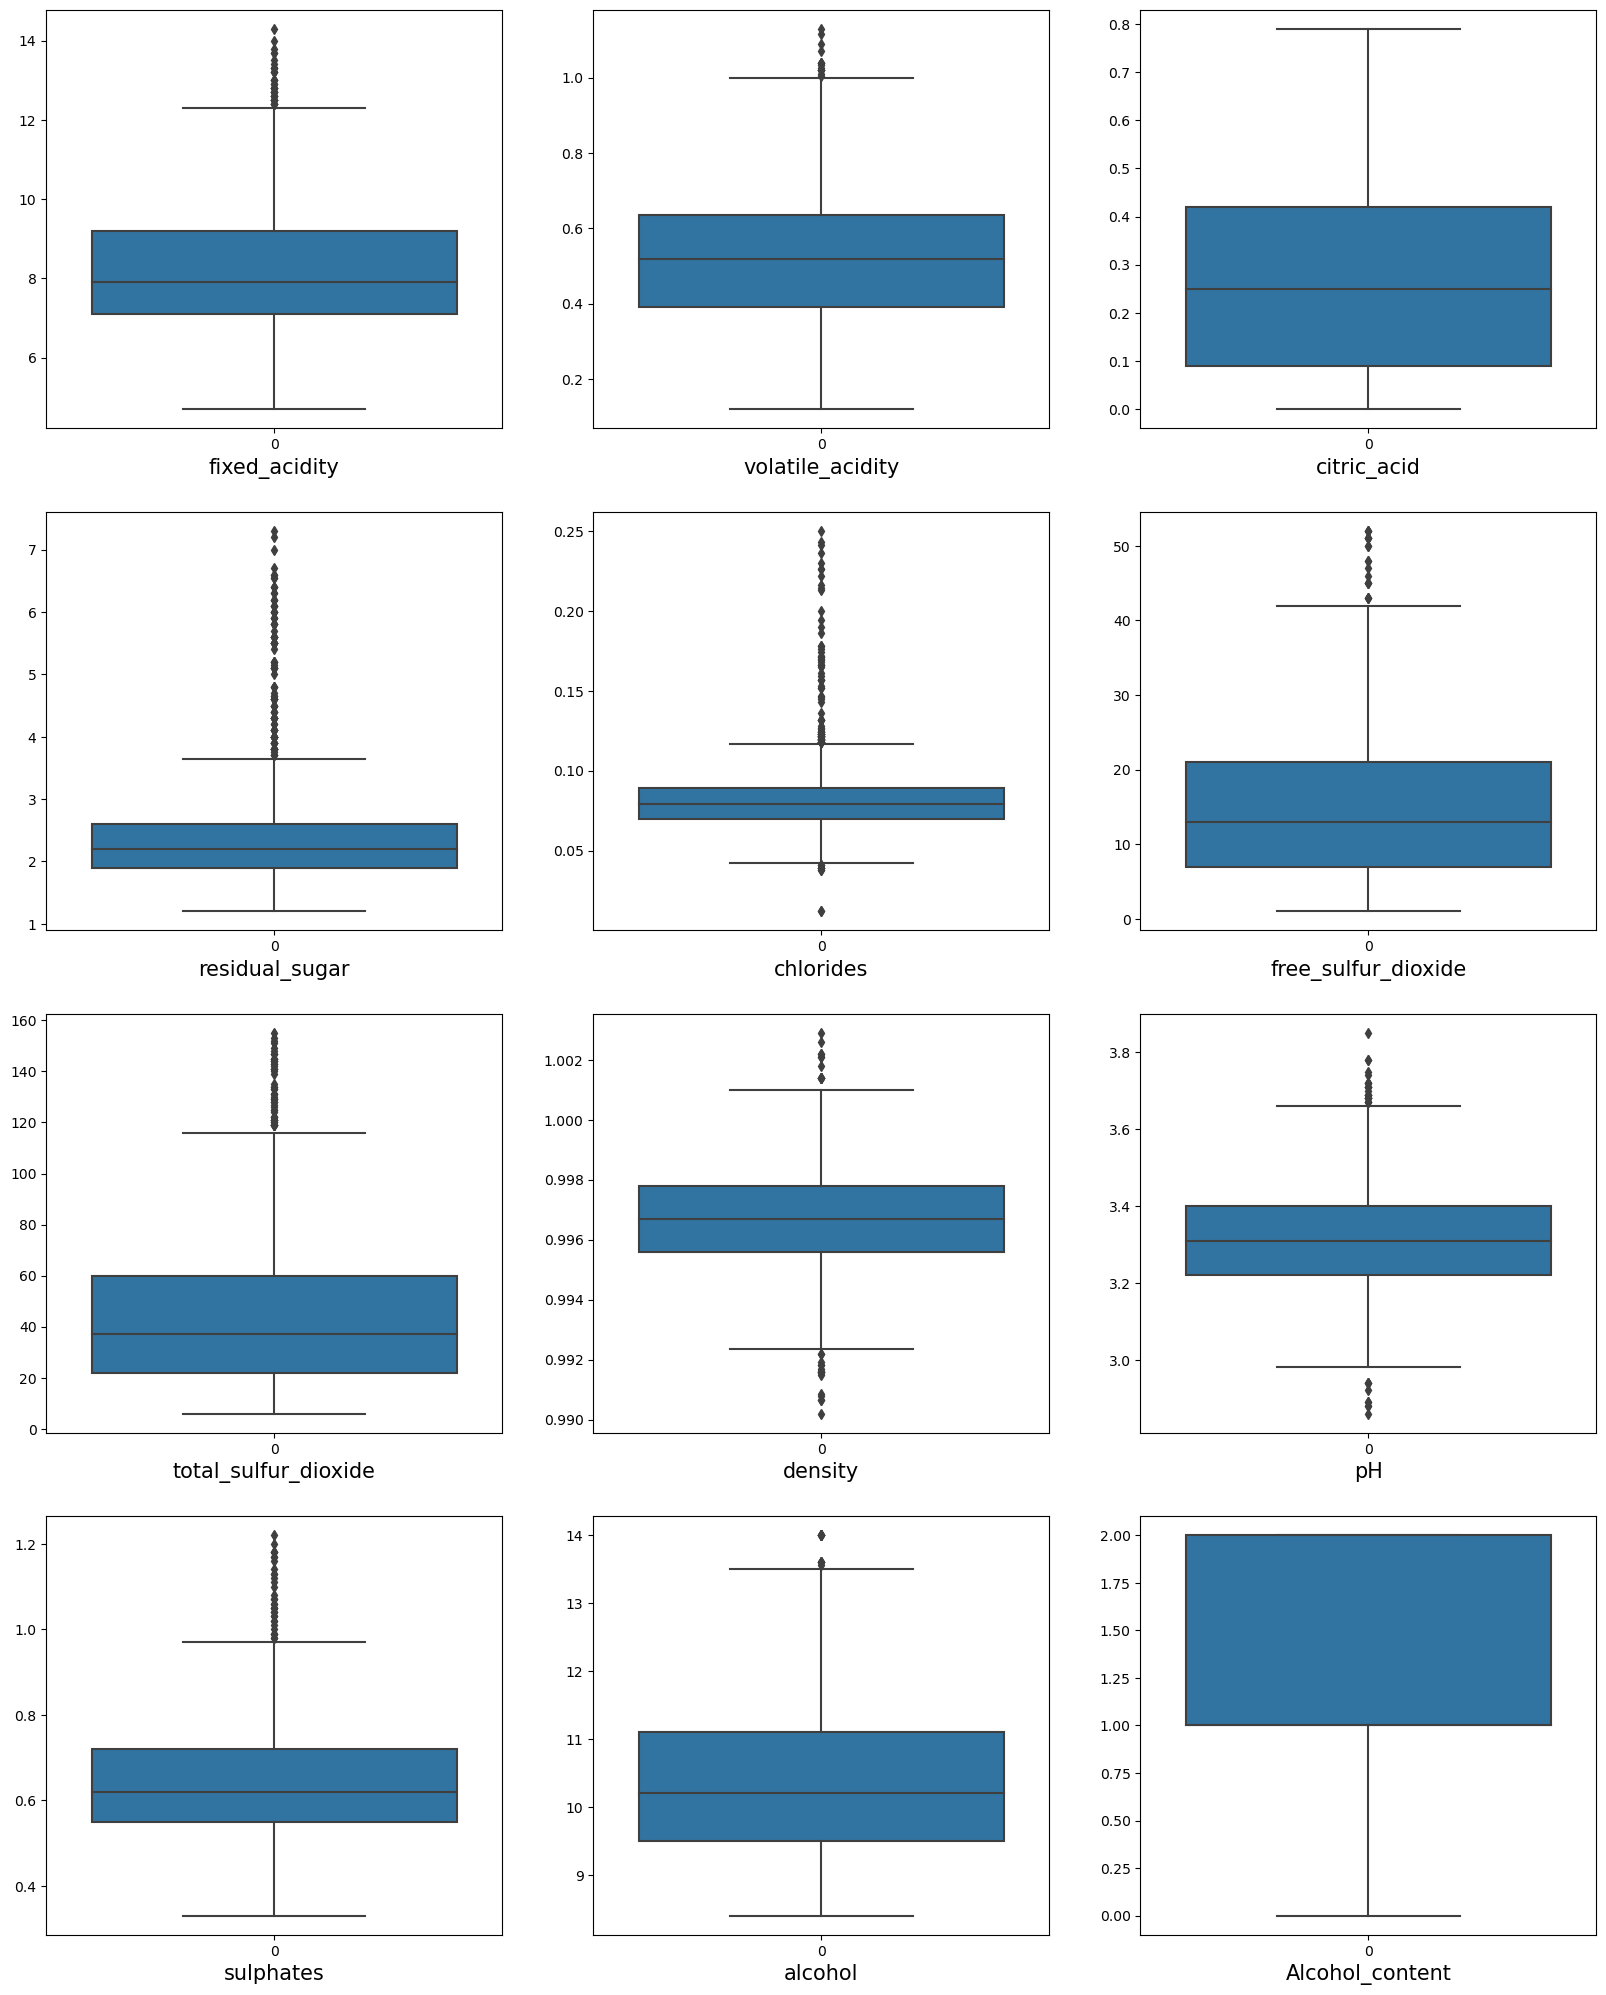

In [137]:
plt.figure(figsize=(20,25))
graph=1
for column in df:
    if graph<=12:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data= df[column])
        plt.xlabel(column,fontsize=15)
    graph +=1
plt.show()

In [97]:
# find the IQR (Inter quantile range) to identify outliers
#Ist quantile
q1= df.quantile(0.25)
# 3rd quantile(0.75)
q3= df.quantile(0.75)
#IQR
iqr=q3-q1

In [98]:
sulphates_high=(q3.sulphates + 1.5*iqr.sulphates)
sulphates_high

0.9749999999999999

In [99]:
index=np.where(df['sulphates']> sulphates_high)
index

(array([  38,   73,   79,  146,  184,  312,  313,  323,  341,  344,  348,
         349,  350,  385,  445,  449,  450,  469,  470,  472,  481,  488,
         548,  645,  745,  802,  892, 1095, 1102, 1220, 1221, 1294, 1297,
        1327, 1332], dtype=int64),)

In [108]:
sulphates_high=(q3.sulphates + 1.5*iqr.sulphates)
print(sulphates_high)
index=np.where(df['sulphates']> sulphates_high)
print(index)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.9749999999999999
(array([], dtype=int64),)
(0, 13)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality


In [58]:
pH_high=(q3.pH+ 1.5*iqr.pH)
print(pH_high)
index=np.where(df['pH']> pH_high)
print(index)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

3.6699999999999995
(array([  80,   81,  125,  127,  241,  249,  268,  269,  270,  497,  527,
        746,  850,  854,  915,  916, 1022, 1085, 1134, 1173, 1200, 1268,
       1373, 1376, 1473], dtype=int64),)
(1456, 13)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1.0,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1.0,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1.0,5
1452,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2.0,6
1453,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2.0,6
1454,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1.0,5


In [101]:
density_high=(q3.density+ 1.5*iqr.density)
print(density_high)
index=np.where(df['density']> density_high)
print(index)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

1.0011
(array([265, 318, 328, 330, 336, 340, 350, 482, 500, 505, 546, 813],
      dtype=int64),)
(1469, 13)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1.0,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1.0,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1.0,5
1465,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2.0,6
1466,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2.0,6
1467,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1.0,5


In [102]:
fixed_acidity_high=(q3.chlorides+ 1.5*iqr.fixed_acidity)
print(fixed_acidity_high)
index=np.where(df['fixed_acidity']> fixed_acidity_high)
print(index)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

3.2389999999999994
(array([   0,    1,    2, ..., 1466, 1467, 1468], dtype=int64),)
(0, 13)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality


In [103]:
volatile_acidity_high=(q3.volatile_acidity+ 1.5*iqr.volatile_acidity)
print(volatile_acidity_high)
index=np.where(df['volatile_acidity']> volatile_acidity_high)
print(index)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

1.0025
(array([], dtype=int64),)
(0, 13)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality


In [104]:
residual_sugar_high=(q3.residual_sugar+ 1.5*iqr.residual_sugar)
print(residual_sugar_high)
index=np.where(df['residual_sugar']> residual_sugar_high)
print(index)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

3.6500000000000004
(array([], dtype=int64),)
(0, 13)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality


In [105]:
total_sulfur_dioxide_high=(q3.total_sulfur_dioxide + 1.5*iqr.total_sulfur_dioxide)
print(total_sulfur_dioxide_high)
index=np.where(df['total_sulfur_dioxide']> total_sulfur_dioxide_high)
print(index)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

117.375
(array([], dtype=int64),)
(0, 13)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality


In [138]:
x=df.drop(columns=['quality','Alcohol_content'])
y=df['quality']

In [139]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.30, random_state=41)

In [140]:
# Write function and call many times to check accurary score of different models
def metric_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n====================== Train Result===================================")
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
    elif train==False:
              Pred=clf.predict(x_test)
              print("\n====================== Test Result===================================")
              print(f"Accuracy score:{accuracy_score(y_test, Pred)*100:.2f}%")
                    
              print('\n  \n Test Classification Report \n ', classification_report(y_test, Pred, digits=2)) 

In [141]:
#Initiate decisition tree classifier with new parameter and train
dt_clf= DecisionTreeClassifier()
# Train the model
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
# call the function and pass the data set to check the train and test dataset
metric_score(dt_clf,x_train, x_test, y_train, y_test, train=True)  #This is for training score
metric_score(dt_clf,x_train, x_test, y_train, y_test, train=False) # This is for testing score


====================== Train Result===================================
Accuracy score:100.00%

====================== Test Result===================================
Accuracy score:62.71%

  
 Test Classification Report 
                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        14
           5       0.70      0.72      0.71       199
           6       0.66      0.61      0.64       198
           7       0.52      0.57      0.54        60
           8       0.25      0.33      0.29         6

    accuracy                           0.63       480
   macro avg       0.36      0.37      0.36       480
weighted avg       0.63      0.63      0.63       480



In [ ]:
# Letus do hyperparameter tuning to improve the performance of model.

In [142]:
grid_param= {
    'criterion':['gini','entropy'],
    'max_depth': range(10,15),
    'Minimum_samples_leaf':range(2,6),
    'min_samples_split':range(3,8),
    'max_leaf_nodes': range(5,10)
    
}

In [143]:
grid_search = GridSearchCV(estimator=dt_clf,
                         param_grid=grid_param,
                         cv=5,
                         n_jobs=-1)

In [ ]:
grid_search.fit(x_train, y_train)

In [44]:
best_parameters=grid_search.best_params_
print(best_parameters)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [145]:
#REInitiate decisition tree classifier with new parameter and train
dt_clf= DecisionTreeClassifier(criterion='entropy', min_samples_split=3, max_depth=10,max_leaf_nodes=7)
# Train the model
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=7,
                       min_samples_split=3)

In [146]:
# call the function and pass the data set to check the train and test dataset
metric_score(dt_clf,x_train, x_test, y_train, y_test, train=True)  #This is for training score
metric_score(dt_clf,x_train, x_test, y_train, y_test, train=False) # This is for testing score


====================== Train Result===================================
Accuracy score:61.36%

====================== Test Result===================================
Accuracy score:58.46%

  
 Test Classification Report 
                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.64      0.71      0.67       192
           6       0.55      0.59      0.57       190
           7       0.46      0.36      0.40        50
           8       0.00      0.00      0.00         4

    accuracy                           0.58       455
   macro avg       0.28      0.28      0.27       455
weighted avg       0.55      0.58      0.57       455



In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [149]:
lr_clf=LogisticRegression()
dt_clf=DecisionTreeClassifier()
rf_clf=RandomForestClassifier()
kn_clf=KNeighborsClassifier()

In [150]:
# Taining with all classifier
lr_clf.fit(x_train,y_train)
dt_clf.fit(x_train,y_train)
rf_clf.fit(x_train,y_train)
kn_clf.fit(x_train,y_train)
print('all model are train')

all model are train


In [152]:
#Lets check the score of all model

In [153]:
# call the function and pass the data set to check the train and test dataset
metric_score(dt_clf,x_train, x_test, y_train, y_test, train=True)  #This is for training score
metric_score(dt_clf,x_train, x_test, y_train, y_test, train=False) # This is for testing score


====================== Train Result===================================
Accuracy score:100.00%

====================== Test Result===================================
Accuracy score:58.46%

  
 Test Classification Report 
                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.08      0.06      0.07        16
           5       0.69      0.68      0.68       192
           6       0.59      0.58      0.59       190
           7       0.43      0.48      0.45        50
           8       0.00      0.00      0.00         4

    accuracy                           0.58       455
   macro avg       0.30      0.30      0.30       455
weighted avg       0.59      0.58      0.59       455



In [154]:
# call the function and pass the data set to check the train and test dataset
metric_score(lr_clf,x_train, x_test, y_train, y_test, train=True)  #This is for training score
metric_score(lr_clf,x_train, x_test, y_train, y_test, train=False) # This is for testing score


====================== Train Result===================================
Accuracy score:60.23%

====================== Test Result===================================
Accuracy score:55.82%

  
 Test Classification Report 
                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.62      0.67      0.65       192
           6       0.52      0.64      0.57       190
           7       0.25      0.08      0.12        50
           8       0.00      0.00      0.00         4

    accuracy                           0.56       455
   macro avg       0.23      0.23      0.22       455
weighted avg       0.51      0.56      0.53       455



In [155]:
# call the function and pass the data set to check the train and test dataset
metric_score(kn_clf,x_train, x_test, y_train, y_test, train=True)  #This is for training score
metric_score(kn_clf,x_train, x_test, y_train, y_test, train=False) # This is for testing score


====================== Train Result===================================
Accuracy score:67.11%

====================== Test Result===================================
Accuracy score:48.35%

  
 Test Classification Report 
                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.54      0.65      0.59       192
           6       0.46      0.46      0.46       190
           7       0.28      0.16      0.20        50
           8       0.00      0.00      0.00         4

    accuracy                           0.48       455
   macro avg       0.21      0.21      0.21       455
weighted avg       0.45      0.48      0.46       455



In [156]:
# call the function and pass the data set to check the train and test dataset
metric_score(rf_clf,x_train, x_test, y_train, y_test, train=True)  #This is for training score
metric_score(rf_clf,x_train, x_test, y_train, y_test, train=False) # This is for testing score


====================== Train Result===================================
Accuracy score:100.00%

====================== Test Result===================================
Accuracy score:67.25%

  
 Test Classification Report 
                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.74      0.75      0.75       192
           6       0.65      0.72      0.68       190
           7       0.52      0.52      0.52        50
           8       0.00      0.00      0.00         4

    accuracy                           0.67       455
   macro avg       0.32      0.33      0.32       455
weighted avg       0.64      0.67      0.66       455



In [ ]:
# LETUS THE CHECK THE ROC AUC CURVE FOR FITTED MODEL

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [159]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

In [162]:
x=df.drop(columns=['quality','Alcohol_content'])
y=df['quality']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.30, random_state=41)

In [163]:
# Taining with all classifier
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
print('all model are train')

all model are train


In [164]:
lr.score(x_train,y_train)

0.6022620169651273

In [165]:
dt.score(x_train,y_train)

1.0

In [166]:
kn.score(x_train,y_train)

0.6710650329877474

In [167]:
rf.score(x_train,y_train)

1.0

In [168]:
# How well our model works on Testing Data
disp=plot_roc_curve(dt,x_test, y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

ValueError: Expected 'estimator' to be a binary classifier, but got DecisionTreeClassifier fit on multiclass (6 classes) data

In [91]:
# How well our model works on Training Data
disp=plot_roc_curve(dt,x_train, y_train)
plot_roc_curve(lr, x_train, y_train, ax=disp.ax_)
plot_roc_curve(rf, x_train, y_train, ax=disp.ax_)
plot_roc_curve(kn, x_train, y_train, ax=disp.ax_)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

ValueError: Expected 'estimator' to be a binary classifier, but got DecisionTreeClassifier fit on multiclass (6 classes) data